In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df=pd.read_csv('../course_notebooks/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot: xlabel='TV', ylabel='sales'>

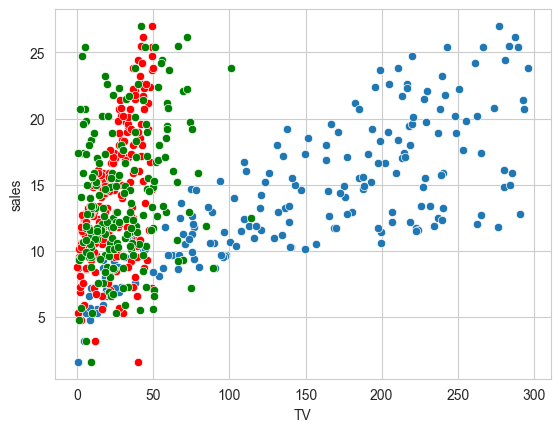

In [42]:
sns.scatterplot(df,x='TV',y='sales')
sns.scatterplot(df,x='radio',y='sales',color='red')
sns.scatterplot(df,x='newspaper',y='sales',color='green')


In [43]:
x=df.drop('sales',axis=1)
y=df['sales']

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=101)


In [46]:
print(len(df))
print(len(x_train))
print(len(x_test))


200
134
66


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

In [50]:
test_prediction = model.predict(x_test)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
# mean absolute error
(abs(test_prediction - y_test)).mean()

1.2369188494259309

In [53]:
mean_absolute_error(y_test,test_prediction)

1.2369188494259309

In [54]:
# mean squared error
((test_prediction - y_test) ** 2).mean()

2.348375242713826

In [55]:
mean_squared_error(y_test,test_prediction)

2.348375242713826

In [56]:
# root mean squared error
(((test_prediction - y_test) ** 2).mean()) ** (1 / 2)

1.5324409426512415

In [57]:
np.sqrt(mean_squared_error(y_test,test_prediction))

1.5324409426512415

In [58]:
test_residuals=y_test-test_prediction

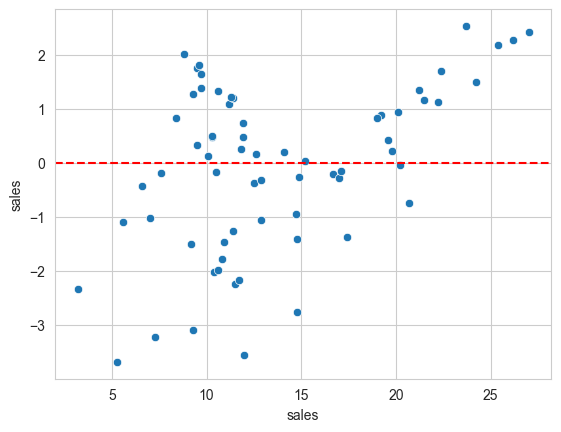

In [59]:
plt.ylim([-3,3])
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

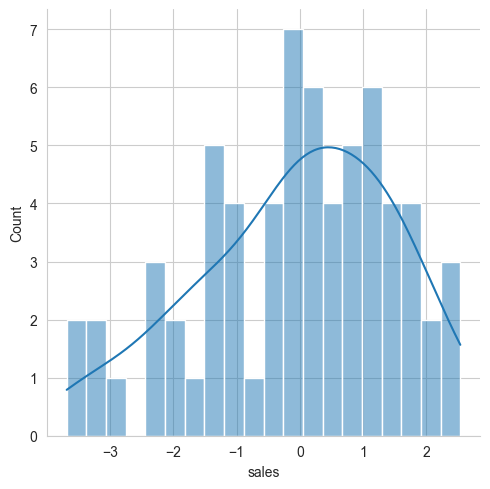

In [60]:
sns.displot(test_residuals,bins=20,kde=True)


In [61]:
import scipy as sp

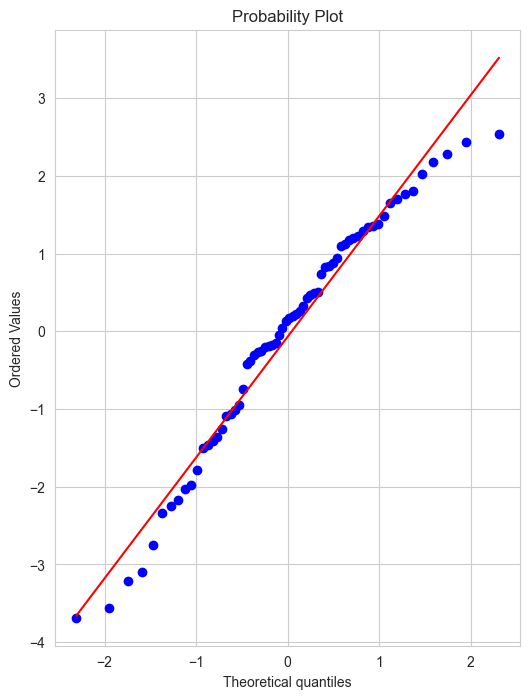

In [62]:
fig, ax=plt.subplots(figsize=(6,8))
_=sp.stats.probplot(test_residuals,plot=ax)


In [63]:
final_model=LinearRegression()
final_model.fit(x,y)

LinearRegression()

In [64]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [65]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [66]:
from joblib import dump,load

In [67]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [69]:
loaded_model=load('final_sales_model.joblib')

In [70]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
campaign=[[149,23,12]]

In [72]:
loaded_model.predict(campaign)


C:\projects\python-ml\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.08156201])